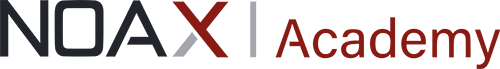

# El ABC del machine learning: regresión lineal (1ª parte)
#### **Álvaro Méndez Civieta** 

Este cuaderno complementa al artículo del blog de NOAX Academy. ¡Léelo ahora!

¡Hola amig@s de NOAX!

Con este post inauguramos una serie dedicada a hablar de problemas de regresión lineal. La regresión lineal es seguramente el primer algoritmo de machine learning con el que todo analista de datos se cruza cuando está formandose. Es un modelo simple, pero muy utilizado y que sienta las bases para otros modelos más complicados. ¡Así que empecemos!




## Identificando un problema de regresión

¿Qué tienen en común estas tres cosas?

* Queremos predecir los beneficios de una compañía a partir de sus métricas de producción y venta;
* Queremos predecir el precio de venta de unas casas en base al tamaño y a información socio económica del barrio;
* Queremos predecir la contaminación del aire a partir de imágenes satelite de una región.

En los tres casos estamos intentando **predecir el valor numérico** de una variable que llamaremos **dependiente** a partir de la información conocida de otras variables, que llamaremos **independientes**. Por ejemplo, el precio de las casas es la variable dependiente, y su tamaño es la variable independiente (ya que el precio de la casa depende del tamaño).

Así que ya sabemos distinguir si un problema es de regresión, pero ¿qué quiere decir que sea lineal?

## Es lineal si...

Diremos que un problema de regresión es lineal si podemos expresar la **relación entre la variable dependiente y la variable independiente como una línea recta.** La siguiente figura muestra un ejemplo de una relación lineal y otro de una relación no lineal.

![Relación lineal vs relación no lineal](http://blog.noaxacademy.com/wp-content/uploads/2021/10/relacion_lineal_no_lineal.png)
**Figura 1 |** A la izquierda, relación lineal entre dos variables. A la derecha, relación no lineal (en este caso cuadrática) entre dos variables.

Así, en la imagen de la izquierda, la variable dependiente, que normalmente se representa como '$y$' se puede expresar como la ecuación de una recta usando la variable independiente '$x$',

\begin{equation}
y = \beta_0 + \beta_1x
\end{equation}

donde el coeficiente $\beta_1$ es la pendiente de la recta y el coeficiente $\beta_0$ se llama intercepto.

## El término de error 
En un momento veremos cómo entender estos coeficientes, pero antes fíjate que en realidad los datos de la imagen izquierda no se ajustan *perfectamente* a una linea recta, sino que más bien se aproximan, es decir, **para cada punto hay un cierto error entre el valor de la ecuación de la linea recta  y el verdadero valor de $y$.** Ese error debe tenerse en cuenta en nuestra ecuación, y se suele representar como '$\varepsilon$', así que la ecuación del modelo de regresión lineal es,

\begin{equation}
y = \beta_0 + \beta_1x + \varepsilon
\end{equation}

Si definimos el vector $\beta=(\beta_0,\beta_1)$ y la matriz $X=(1,x)$, donde ese $1$ es una columna de unos, y $x$ es una columna con el vector de la variable independiente, podemos escribir lo anterior de forma más compacta como,

\begin{equation}
y = X\beta + \varepsilon
\end{equation}

## Veámoslo en python
Vamos a generar un conjunto de datos utilizando la ecuación anterior. Es decir, vamos a crear un vector con números aleatorios que serán nuestra variable independiente $x$, y  asignaremos valores a los coeficientes $\beta_0$ y $\beta_1$ de forma que podamos "calcular" el valor de la variable dependiente $y$

In [ ]:
import numpy as np
np.random.seed(5)

x = np.random.normal(loc=0, scale=1, size=100)  # variable independiente
beta_1 = 3  # pendiente
beta_0 = 4  # intercepto
error = np.random.normal(loc=0, scale=1, size=100)  # error

y = beta_0 + x * beta_1 + error  # variable dependiente

En este caso conocemos los valores de los parámetros $\beta_0$ y $\beta_1$ pero en la realidad estos valores no son conocidos y hay que estimarlos, de eso se encargan los modelos de regresión, más adelante veremos cómo. Por ahora veamos qué pasa con la linea recta si cambiamos los valores de los cieficientes:

In [ ]:
import matplotlib.pyplot as plt

def abline(pendiente, intercepto, color):
    """Pintar una linea en base a una pendiente y un intercepto"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercepto + pendiente * x_vals
    plt.plot(x_vals, y_vals, '--', color=color)


En primer lugar representamos la nube de puntos de nuestro conjunto de datos y, en rojo la linea recta asociada a la ecuación $y=4+3x$,

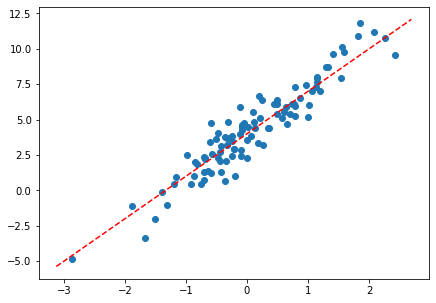

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(x, y)
abline(pendiente=3, intercepto=4, color='red')

El valor del **intercepto** $\beta_0$ es el **valor que tiene la variable dependiente $y$ cuando la variable independiente $x$ vale 0.** Si estuviésemos trabajando, por ejemplo, en el problema de regresión de estimar el beneficio de una empresa en base a sus ventas,  el intercepto sería el beneficio de la empresa cuando las ventas son 0 (seguramente la empresa estaría en pérdidas, es decir, el intercepto sería un número negativo).

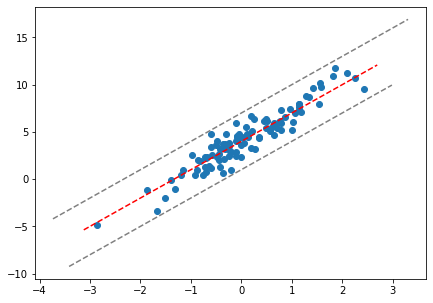

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(x, y)
abline(pendiente=3, intercepto=4, color='red')
abline(pendiente=3, intercepto=1, color='grey')
abline(pendiente=3, intercepto=7, color='grey')

El valor de la **pendiente** $\beta_1$ mide la inclinación de la recta, y es el **valor que gana la variable dependiente $y$ cuando la variable independiente $x$ aumenta en una unidad.** Si estuviésemos en el problema de regresión de estimar el beneficio de una empresa en base a sus ventas, la pendiente sería en cuantos euros aumenta el beneficio de la empresa por cada producto vendido.

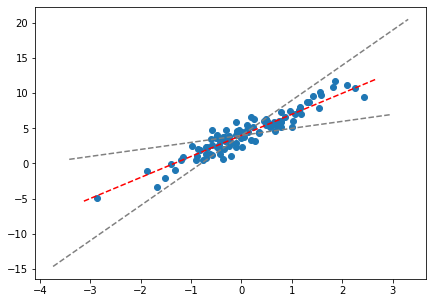

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(x, y)
abline(pendiente=3, intercepto=4, color='red')
abline(pendiente=1, intercepto=4, color='grey')
abline(pendiente=5, intercepto=4, color='grey')

## Estimando el valor de los parámetros
Como decíamos, en nuestro conjunto de datos simulado sabemos el verdadero valor del vector $\beta=(\beta_0, \beta_1$) pero en la práctica no se conoce y debe ser estimado. Denotaremos a esta estimacion como $\hat\beta$. Este vector de parámetros puede tomar infinitos posibles valores, pero está claro que con algunos la recta de regresión se ajusta mejor a los datos que con otros. **¿Cómo buscamos la mejor estimación?**

Buscaremos la estimacion $\hat\beta$ con la que la recta estimada,

\begin{equation}
\hat{y}=X\hat\beta=\hat\beta_0+\hat\beta_1x
\end{equation}

encaje lo mejor posible en la nube de puntos. Es decir, queremos que la distancia entre el valor de la variable dependiente $y$ y su predicción $\hat{y}$ dada por la recta de regresión sea lo menor posible. La siguiente figura representa la distancia de cada punto a su predicción dada por la recta.

![Distancia de los puntos a la predicción dada por la recta de regresión](http://blog.noaxacademy.com/wp-content/uploads/2021/10/distancia_residuos.png)
**Figura 2 |** Distancia de los puntos a la predicción dada por la recta de regresión.

Si en nuestro conjunto de datos tenemos $n$ puntos (normalmente llamados observaciones), podemos escribir matemáticamente nuestro objetivo como:

\begin{equation}
J(\beta)=\text{min}\left\{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2\right\}=\text{min}\left\{\frac{1}{n}(y_i-X\hat\beta)^t(y_i-X\hat\beta)\right\}
\end{equation}

Esto es lo que se conoce como la función de coste, o función de pérdida del modelo de regresión lineal, en la que como vemos, estamos elevando al cuadrado las diferencias. Además, como lo que buscamos es minimizar estas diferencias, a este modelo se le conoce como **mínimos cuadrados** o en ingles, least squares.


## Resolviendo el problema de minimización

La siguiente parte es un poco más técnica, puedes saltarla ya que no afectará a la parte final del post, pero si quieres ver los detalles de cómo se resuelve el problema de regresión, ¡sigue leyendo! Recordando las clases de cálculo, para buscar el mínimo de una función en matemáticas, debemos calcular su derivada,

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta}=\frac{2}{n}\left( X^tX\beta-X^t y\right)
\end{equation}

Y una vez calculada, debemos despejar el valor de $\beta$ para el cual la derivada sea igual a $0$,

\begin{equation}
\frac{2}{n}\left( X^tX\beta-X^t y\right)=0 \Leftrightarrow X^t(y-X\beta)=0
\end{equation}

Con lo que obtenemos la solución,

\begin{equation}
\hat\beta=(X^tX)^{-1}X^ty
\end{equation}

## Calculando la solución en python
Calculemos nuestra estimación para el parámetro $\hat\beta$ en el conjunto de datos que generamos antes. Lo haremos de dos formas:

* Usando la ecuación que acabamos de obtener.
* Usando el paquete de python de scikit-learn.

Si hemos hecho bien las cuentas, las dos formas deberían dar el mismo resultado.

In [ ]:
vector_unos = np.ones(len(x))  # Generamos el vector de unos
X = np.c_[vector_unos, x]  # Añadimos la columna de unos

beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print(f'Estimación del intercepto: {np.round(beta_hat[0], 3)}\nEstimación de la pendiente: {np.round(beta_hat[1], 3)}')

Estimación del intercepto: 4.013
Estimación de la pendiente: 3.152


Obtenemos una estimación de $\hat\beta_0=4.013$, un valor muy cercano al verdadero valor $\beta_0=4$, y $\hat\beta_1=3.152$, también un valor muy cercano al verdadero valor $\beta_1=3$. Si resolvemos el modelo con el paquete de machine learning `scikit-learn` la solución que obtenemos es,

In [ ]:
from sklearn.linear_model import LinearRegression 

modelo_regresion = LinearRegression()
modelo_regresion.fit(x.reshape((-1,1)), y)

print(f'Estimación del intercepto: {np.round(modelo_regresion.intercept_, 3)}\nEstimación de la pendiente: {np.round(modelo_regresion.coef_[0], 3)}')

Estimación del intercepto: 4.013
Estimación de la pendiente: 3.152


Como era de esperar, ambas opciones dan exactamente la misma solución. Es decir, la ecuación de nuestra recta de regresión es 

\begin{equation}
\hat{y}=4.013 +3.15x
\end{equation}

Aquí termina nuestra introducción al modelo de regresión lineal, pero si quereis ver las ventajas e inconvenientes de estos modelos, cómo los usamos para resolver un conjunto de datos real, ver qué es la regresión lasso, y mucho más... ¡estad atentos a los siguientes posts!

## Acerca del autor
###**Álvaro Méndez Civieta**
Álvaro Méndez obtuvo el título en matemáticas en 2015 por la Universidad de Oviedo, y el master en Big Data Analytics por la Universidad Carlos III en 2016. Después de un año trabajando en la consultora Accenture se unió al programa de doctorado de ingeniería matemática de la Universidad Carlos III, donde continúa trabajando en el desarrollo de modelos de selección de variables en espacios de alta dimensión, con aplicaciones al campo de la genética.
